# MA 541 Final Report
<br>
Hai Huang, Xiaoyi Leng, Tianyi Li, Yankai Zhao, Shaocheng Wang 

In [205]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as sm
import scipy.stats as stats
import pylab
import random
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt

# Part 1: Meet data

In [206]:
#read data
df = pd.read_excel('/home/jovyan/work/the data for your group project_MA541.xlsx')
#look data
df.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [207]:
#calculate mean and standard deviation of each columns
print("ETF mean:",df.Close_ETF.mean())
print("ETF standard deviation:",df.Close_ETF.std())

print("Oil mean:",df.oil.mean())
print("Oil standard deviation:",df.oil.std())

print("Gold mean:",df.gold.mean())
print("Gold standard deviation:",df.gold.std())

print("JPM mean:",df.JPM.mean())
print("JPM standard deviation:",df.JPM.std())

ETF mean: 121.152960012
ETF standard deviation: 12.569790313110744
Oil mean: 0.0010300354937470017
Oil standard deviation: 0.021092898551005313
Gold mean: 0.0006628360819999999
Gold standard deviation: 0.011289060259316142
JPM mean: 0.0005304110210000001
JPM standard deviation: 0.011016562382593569


In [208]:
df.corr()

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,-0.009045,0.022996,0.036807
oil,-0.009045,1.000000,0.235650,-0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,-0.120849,0.100170,1.000000


the sample correlations among each pair of the four random variables (columns) of the data


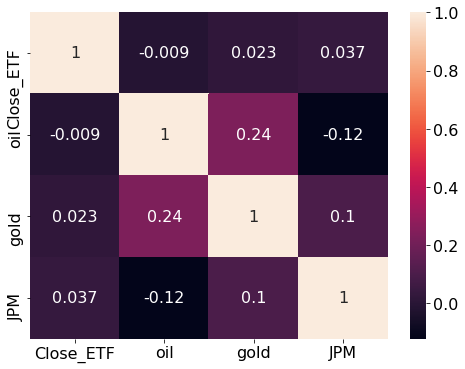

In [209]:
data_corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data_corr,annot=True)
plt.show()

# Part 2 Describe data

Histograms of four columns

<AxesSubplot:ylabel='Frequency'>

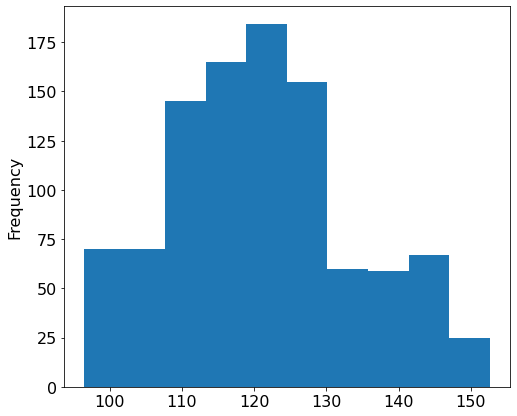

In [210]:
df.Close_ETF.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

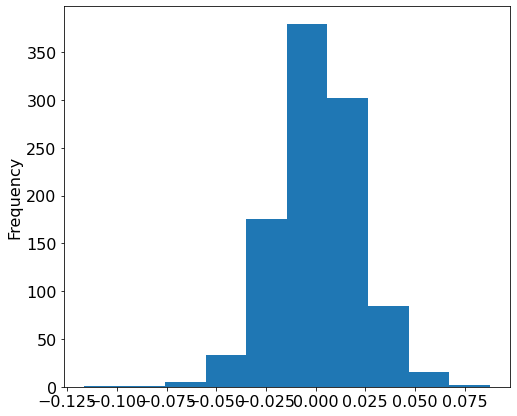

In [211]:
df.oil.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

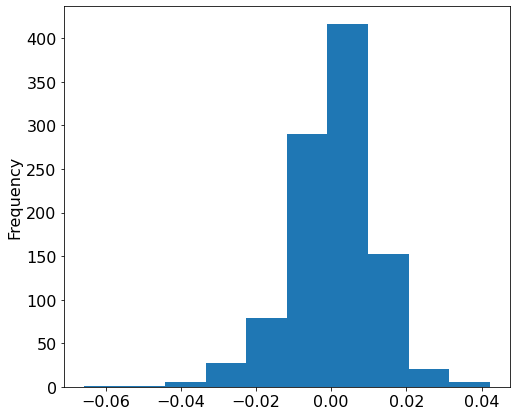

In [212]:
df.gold.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

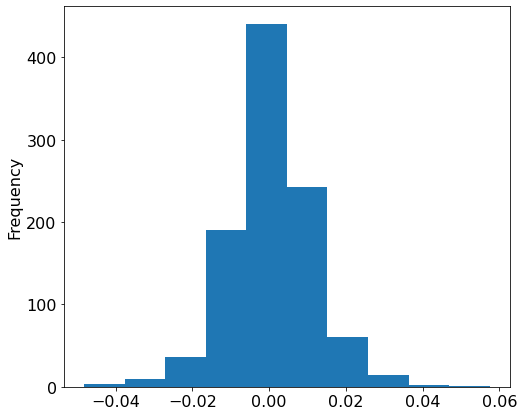

In [213]:
df.JPM.plot(kind = 'hist')

2) A time series plot for each column (hint: use the series “1, 2, 3, …, 1000” as the horizontal axis; four plots total)


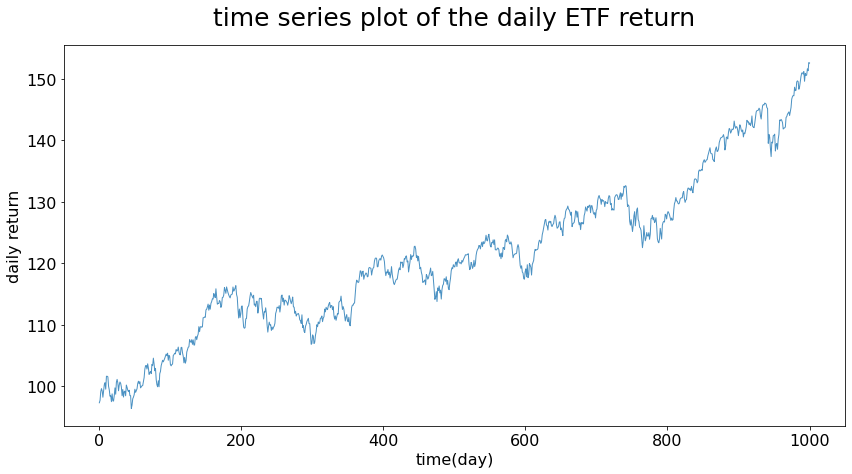

In [214]:
plt.figure(figsize=(14, 7))
plt.plot([i for i in range(1,1001)], df.Close_ETF, linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("daily return", fontsize=16)
plt.title("time series plot of the daily ETF return", fontsize=25, color='black', pad=20)
plt.show()

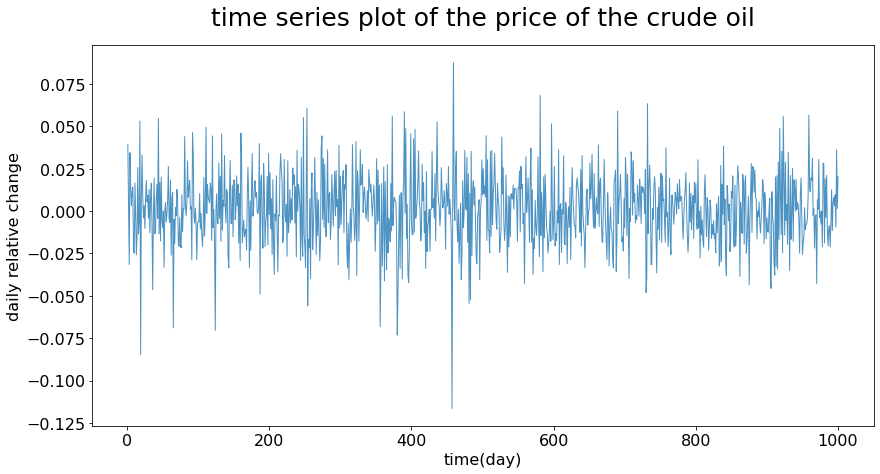

In [215]:
plt.figure(figsize=(14, 7))
plt.plot([i for i in range(1,1001)], df.oil, linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("daily relative change", fontsize=16)
plt.title("time series plot of the price of the crude oil", fontsize=25, color='black', pad=20)
plt.show()

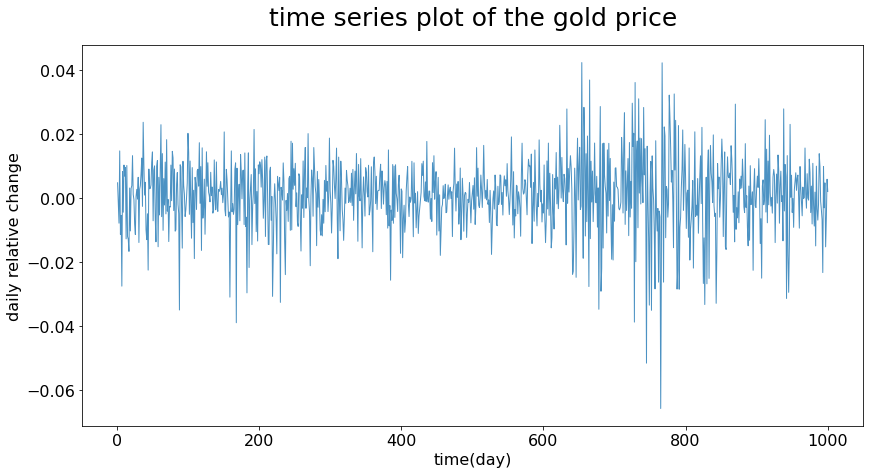

In [216]:
plt.figure(figsize=(14, 7))
plt.plot([i for i in range(1,1001)], df.gold, linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("daily relative change", fontsize=16)
plt.title("time series plot of the gold price", fontsize=25, color='black', pad=20)
plt.show()

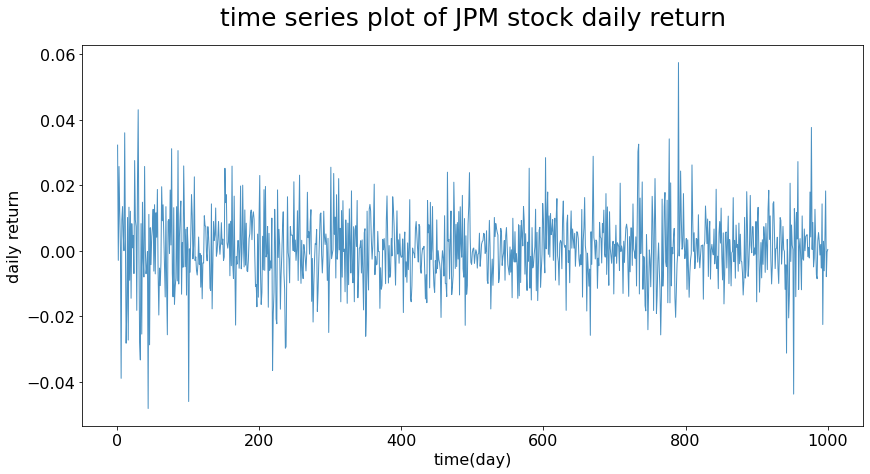

In [217]:
plt.figure(figsize=(14, 7))
plt.plot([i for i in range(1,1001)], df.JPM, linewidth='1',alpha=0.8)
plt.xlabel('time(day)', fontsize=16)
plt.ylabel("daily return", fontsize=16)
plt.title("time series plot of JPM stock daily return", fontsize=25, color='black', pad=20)
plt.show()

3) A time series plot for all four columns (hint: one plot including four “curves” and each “curve” describes one column)


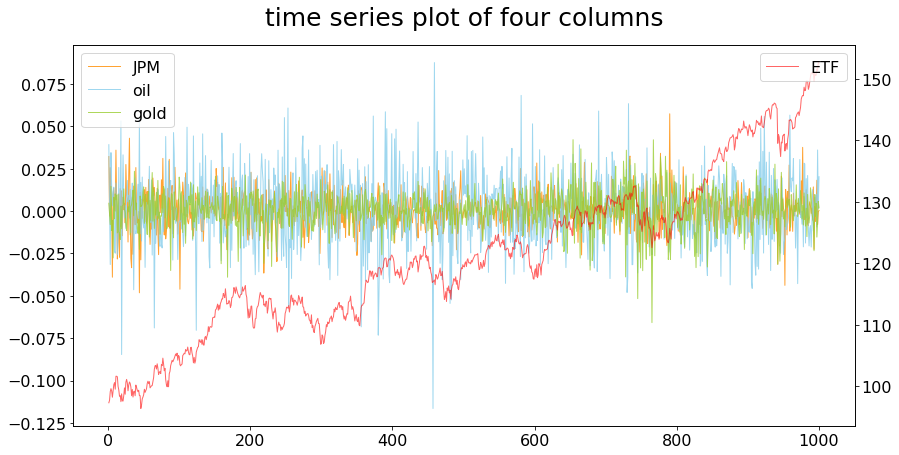

In [218]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(111)
ax1.plot([i for i in range(1,1001)], df.JPM, linewidth='1',alpha=0.8, label='JPM',color='darkorange')
ax1.plot([i for i in range(1,1001)], df.oil, linewidth='1',alpha=0.8, label='oil',color='skyblue')
ax1.plot([i for i in range(1,1001)], df.gold, linewidth='1',alpha=0.8, label='gold',color='yellowgreen')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot([i for i in range(1,1001)], df.Close_ETF, linewidth='1',alpha=0.6, label='ETF',color='r')
ax2.legend(loc=1)
# plt.legend()
# plt.xlabel('time(day)', fontsize=16)
# plt.ylabel("daily return", fontsize=16)
plt.title("time series plot of four columns", fontsize=25, color='black', pad=20)
plt.show()


4) Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively


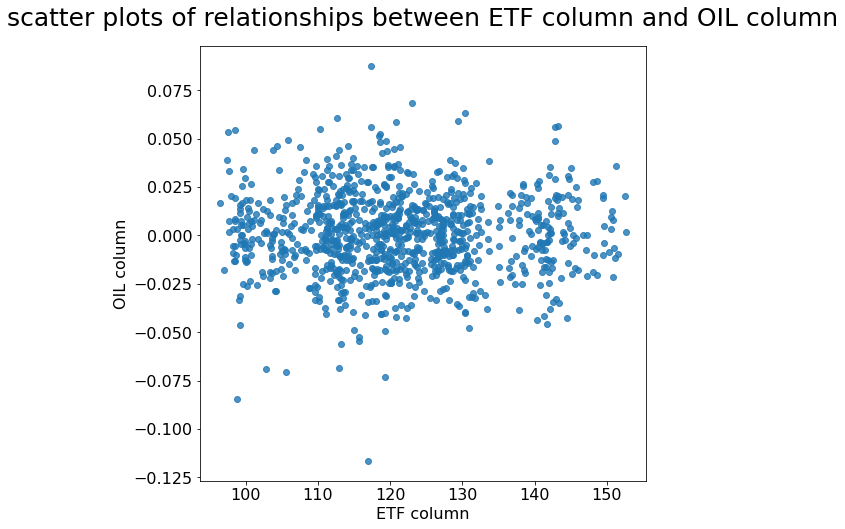

In [219]:
plt.figure(figsize=(8, 8))
plt.scatter(df.Close_ETF,df.oil,alpha=0.8)
plt.xlabel('ETF column', fontsize=16)
plt.ylabel("OIL column", fontsize=16)
plt.title("scatter plots of relationships between ETF column and OIL column", fontsize=25, color='black', pad=20)
plt.show()


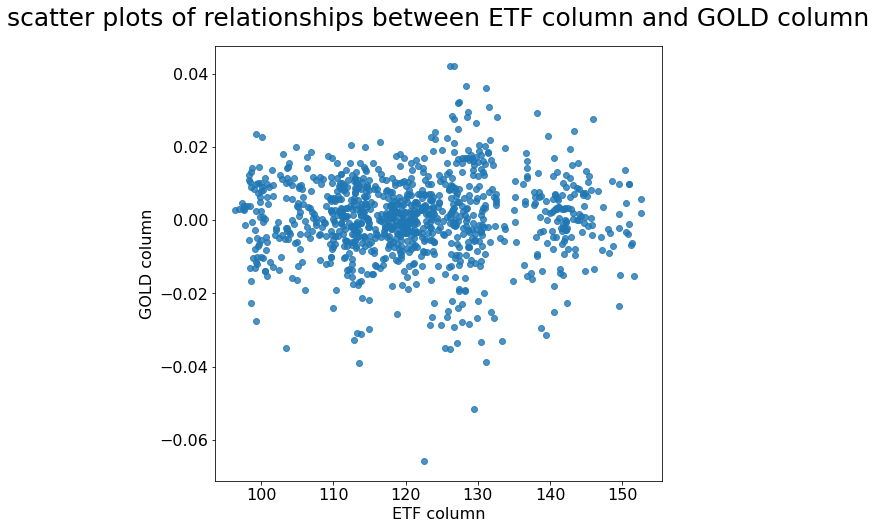

In [220]:
plt.figure(figsize=(8, 8))
plt.scatter(df.Close_ETF,df.gold,alpha=0.8)
plt.xlabel('ETF column', fontsize=16)
plt.ylabel("GOLD column", fontsize=16)
plt.title("scatter plots of relationships between ETF column and GOLD column", fontsize=25, color='black', pad=20)
plt.show()

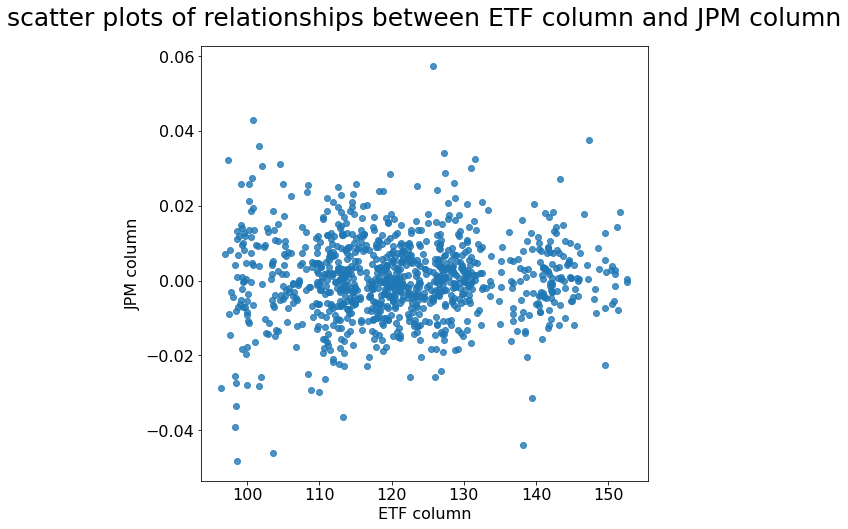

In [221]:
plt.figure(figsize=(8, 8))
plt.scatter(df.Close_ETF,df.JPM,alpha=0.8)
plt.xlabel('ETF column', fontsize=16)
plt.ylabel("JPM column", fontsize=16)
plt.title("scatter plots of relationships between ETF column and JPM column", fontsize=25, color='black', pad=20)
plt.show()

# Part 3 Distribution of the data

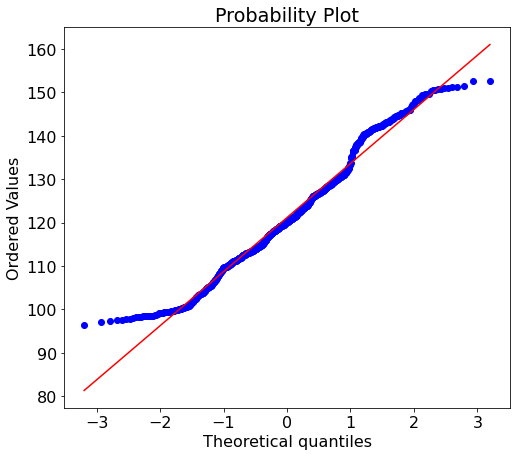

In [222]:
#assume normal distribution?
#Close ETF
stats.probplot(df.Close_ETF, dist="norm", plot=pylab)
pylab.show()


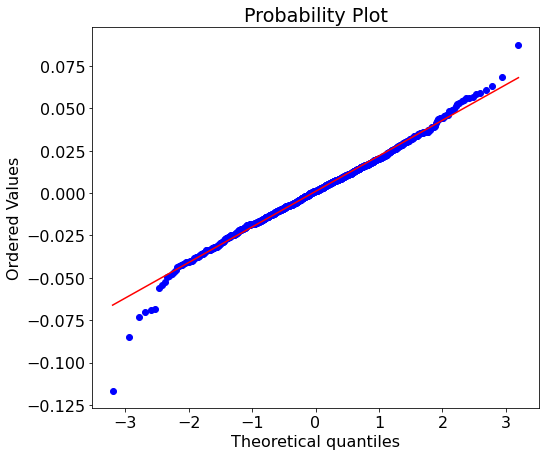

In [223]:
#Oil
stats.probplot(df.oil, dist="norm", plot=pylab)
pylab.show()

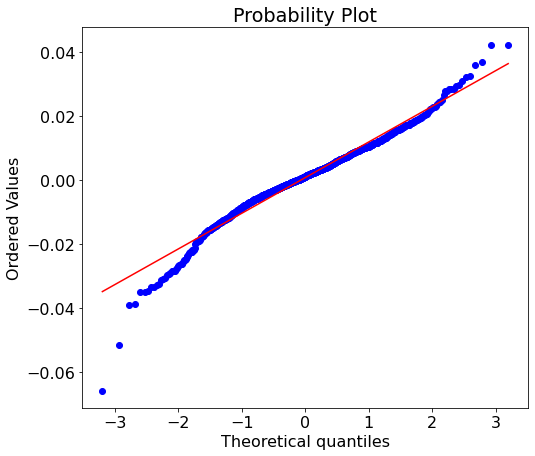

In [224]:
stats.probplot(df.gold, dist="norm", plot=pylab)
pylab.show()

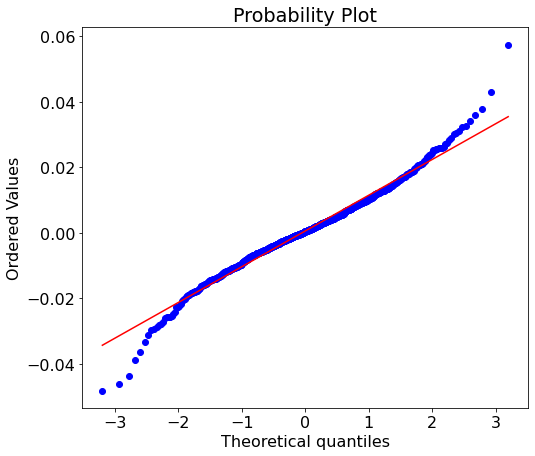

In [225]:
stats.probplot(df.JPM, dist="norm", plot=pylab)
pylab.show()

# Part 4 Sample data and the importance of the CLT

Break your data into small groups and let them discuss the importance of the Central Limit Theorem Requirements. Consider the ETF column (1000 values) as the population(x), and do the follows. Any software may be used.
<br>1)Calculate the mean 𝜇𝑥 and the standard deviation 𝜎𝑥 of the population.

In [226]:
mu_x = np.round(np.mean(df.Close_ETF),decimals=4)
print('Population mean is',mu_x)
sigma = np.round(np.std(df.Close_ETF,ddof=1),decimals=4)
print('Standard deviation is',sigma)

Population mean is 121.153
Standard deviation is 12.5698


2) Break the population into 50 groups sequentially and each group includes 20 values.


In [227]:
l = np.array_split(np.array(df.Close_ETF),50)

3) Calculate the sample mean (𝑥) of each group. Draw a histogram of all thesample means. 
Comment on the distribution of these sample means,i.e., use the histogram to assess the normality of 
the dataconsisting of these sample means.

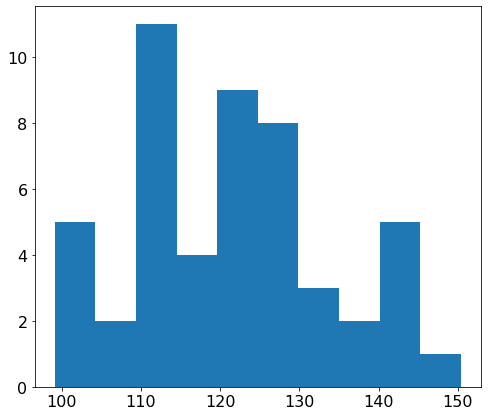

In [228]:
sample_mean = []
for i in range(len(l)): 
   sample_mean.append(np.mean(l[i]))

plt.hist(sample_mean)
plt.show()

4)Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥)of the data including these sample means. 
Make a comparison between 𝜇𝑥 and 𝜇𝑥, between 𝜎𝑥/√𝑛 and 𝜎𝑥. Here, 𝑛 is the number of sample means 
calculated from Item 3) above.

In [229]:
sum_mean = np.mean(sample_mean)
print(sum_mean)

sd_1 = np.std(sample_mean,ddof=1)
print(sd_1)

121.15296001200001
12.615972812491506


5)Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why? <br>
<br>
No the results from 3) and 4) do not consistent with the central limit theorem. Because the data was not picked randomly
from the distribution. 

Break the population into 10 groups sequentially and each group includes 100 values.

In [230]:
l2 = np.array_split(np.array(df.Close_ETF),10)

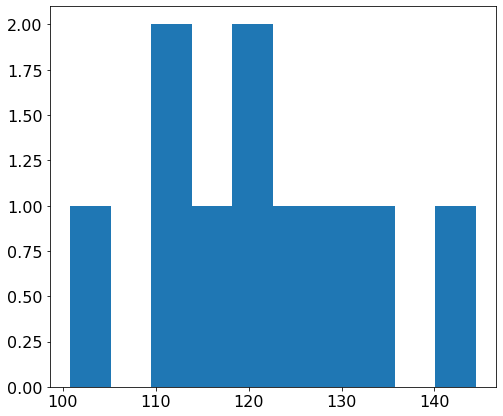

In [231]:
'''
    repeat
'''
sample_mean2 = []
for i in range(len(l2)): 
   sample_mean2.append(np.mean(l2[i]))

plt.hist(sample_mean2)
plt.show()

In [232]:
sum_mean2 = np.mean(sample_mean2)
print(sum_mean2)

sd_2 = np.std(sample_mean2,ddof=1)
print(sd_2)

121.152960012
12.821725528306828


8)Generate 50 simple random samples or groups (with replacement) from the population. The size of each sample is 20, i.e., each group includes 20 values.

In [233]:
n = 20

random_sample50= []
for i in range(50):
    random_sample50.append(np.random.choice(df.Close_ETF,n))

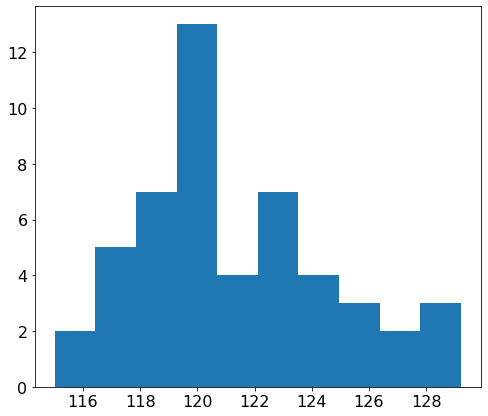

In [234]:
sample_mean3 = []
for i in range(len(random_sample50)): 
   sample_mean3.append(np.mean(random_sample50[i]))

plt.hist(sample_mean3)
plt.show()

In [235]:
sum_mean3 = np.mean(sample_mean3)
print(sum_mean3)

sd_3 = np.std(sample_mean3,ddof=1)
print(sd_3)

121.452759988
3.4273882063979415


10) Generate 10 simple random samples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.

In [236]:
n = 100

random_sample10= []
for i in range(10):
    random_sample10.append(np.random.choice(df.Close_ETF,n))

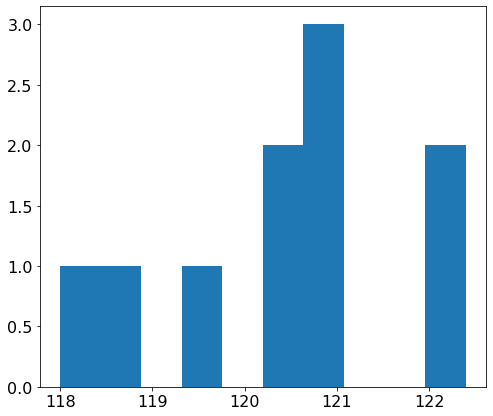

In [237]:
sample_mean4 = []
for i in range(len(random_sample10)): 
   sample_mean4.append(np.mean(random_sample10[i]))

plt.hist(sample_mean4)
plt.show()

In [238]:
sum_mean4 = np.mean(sample_mean4)
print(sum_mean4)

sd_4 = np.std(sample_mean4,ddof=1)
print(sd_4)

120.347249919
1.366761420177806


12) In Part 3 of the project, you have figured out the distribution of the population (the entire ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer.
<br>
<br>
Yes the distribution of the population have impact on the distribution of the sample mean. Since the population is normal distribution, so when we randomly pick data from the population we are more likely to pick up the data around population mean and less likely to pick up data far away from the population mean.

# Part 5 Confidence interval of data

1) Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, 
construct an appropriate 95% confidence interval of the mean 𝜇.

In [239]:
#n is the number of group which I picked
n = 1

sample1 = []
sample1.extend(random_sample10[n])
sample_mean5 = np.mean(sample1)
std_mean5 = np.std(sample1,ddof=1)
print(sample_mean5, std_mean5)

from scipy import stats
conf_interval100 = stats.norm.interval(0.95, loc=sample_mean5, scale=std_mean5)
print("95% confidence interval = ", conf_interval100)

120.96759983999999 13.688952019853735
95% confidence interval =  (94.13774689498985, 147.79745278501014)


2) Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, 
construct an appropriate 95% confidence interval of the mean 𝜇.

In [240]:
#n is the number of group which I picked
n = 1

sample2 = []
sample2.extend(random_sample50[n])
sample_mean6 = np.mean(sample2)
std_mean6 = np.std(sample2,ddof=1)
print(sample_mean6, std_mean6)
conf_interval20 = stats.norm.interval(0.95, loc=sample_mean6, scale=std_mean6)
print("95% confidence interval = ", conf_interval20)

120.61599989999999 13.6196141576931
95% confidence interval =  (93.92204666758968, 147.3099531324103)


3) In Part 1, you have calculated the mean 𝜇 of the population (the entire ETF column) 
using Excel function. Do the two intervals from 1) and 2) above include (the true value 
of) the mean 𝜇? Which one is more accurate? Why?

In [241]:
ETF_mean = df.Close_ETF.mean()
'''
    Interval (1)
'''
sample1.append(ETF_mean)
sample_mean7 = np.mean(sample1)
std_mean7 = np.std(sample1,ddof=1)
conf_interval1 = stats.norm.interval(0.95, loc=sample_mean7, scale=std_mean7)
print("95% confidence interval (1) = ", conf_interval1)
'''
    Interval (2)
'''
sample2.append(ETF_mean)
sample_mean8 = np.mean(sample2)
std_mean8 = np.std(sample2,ddof=1)
conf_interval2 = stats.norm.interval(0.95, loc=sample_mean8, scale=std_mean8)
print("95% confidence interval (2) = ", conf_interval2)

95% confidence interval (1) =  (94.27404399346105, 147.66482618499435)
95% confidence interval (2) =  (94.62250863243239, 146.66063022585334)


5.3 conclusion:
    The second confidence interval is more accurate. Because the interval is smaller.

# Part 6 Hypothesis and test it with data

1) Use the same sample you picked up in Step 1) of Part 5 to test 𝑯𝟎: 𝝁 = 𝟏𝟎𝟎 vs.
𝑯𝒂: 𝝁 ≠ 𝟏𝟎𝟎 at the significance level 0.05. What’s your conclusion? 

In [242]:
from scipy import stats

print(stats.ttest_1samp(conf_interval100, 100.0))
print(stats.ttest_1samp(conf_interval100, 0.0))


Ttest_1sampResult(statistic=0.7815026002182981, pvalue=0.577692013622696)
Ttest_1sampResult(statistic=4.508694106074023, pvalue=0.13894899016828427)


6.1 Since p-value = 0.5311 which is larger than 0.05 we fail to reject null hypothesis.

2) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝁 = 𝟏𝟎𝟎 vs.
𝑯𝒂: 𝝁 ≠ 𝟏𝟎𝟎 at the significance level 0.05. What’s your conclusion?

In [243]:
print(stats.ttest_1samp(conf_interval20, 100.0))
print(stats.ttest_1samp(conf_interval20, 0.0))

Ttest_1sampResult(statistic=0.7723097332383573, pvalue=0.5813415741243654)
Ttest_1sampResult(statistic=4.518476482290183, pvalue=0.13865760289107562)


6.2 Since p-value = 0.5466 which is larger than 0.05 we fail to reject null hypothesis.

3) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝈 = 𝟏𝟓 vs.
𝑯𝒂: 𝝈 ≠ 𝟏𝟓 at the significance level 0.05. What’s your conclusion?

In [244]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
g, p, dof, expctd = chi2_contingency(conf_interval20)
print(g,p)

0.0 1.0


6.3 The null hypothesis is rejected.

4) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝈 = 𝟏𝟓 vs.
𝑯𝒂: 𝝈 < 𝟏𝟓 at the significance level 0.05. What’s your conclusion?

In [245]:
print(stats.chisquare(conf_interval20,15.0).statistic)

1582.3075432067876


6.4 Chi-square value is greater than critical value, so the null hypothesis is rejected.

# Part 7 Compare data with a different data set

1)Consider the entire Gold column as a random sample from the first population, 
and the entire Oil column as a random sample from the second population. 
Assuming these two samples bedrawn independently, form a hypothesis and test it to see if the 
Gold and Oil have equal means in the significance level 0.05.

H0: means equal <br>
H1: means not equal

In [246]:
stats.ttest_ind(df.gold, df.oil, equal_var = False)

Ttest_indResult(statistic=-0.4853666138236087, pvalue=0.6274858963882113)

Since p-value = 0.6275 which is larger than 0.05 we fail to reject null hypothesis. 

2)Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.<br>

H0: mu =0<br>
H1: mu does not = 0

In [247]:
gold_oil_diff = df.oil-df.gold
stats.ttest_1samp(gold_oil_diff, 0)

Ttest_1sampResult(statistic=0.5413309278514735, pvalue=0.5884002009146817)

Since the p-value is larger than 0.05 we do not reject the null hypothesis.

3)Consider the entire Gold column as a random sample from the first population,and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviationsin the significance level 0.05.<br>
<br>
H0: equal standard deviation <br>
H1: not equal

In [248]:
stats.bartlett(df.gold, df.oil)

BartlettResult(statistic=367.1258383807035, pvalue=7.906689618563355e-82)

Since the p-value is less than 0.05 we reject null hypothesis.

# Part 8 Fitting the line to the data

1) Draw a scatter plot of ETF (Y) vs. Gold (X). 
Is there any linear relationship between them which can be observed from the scatter plot?

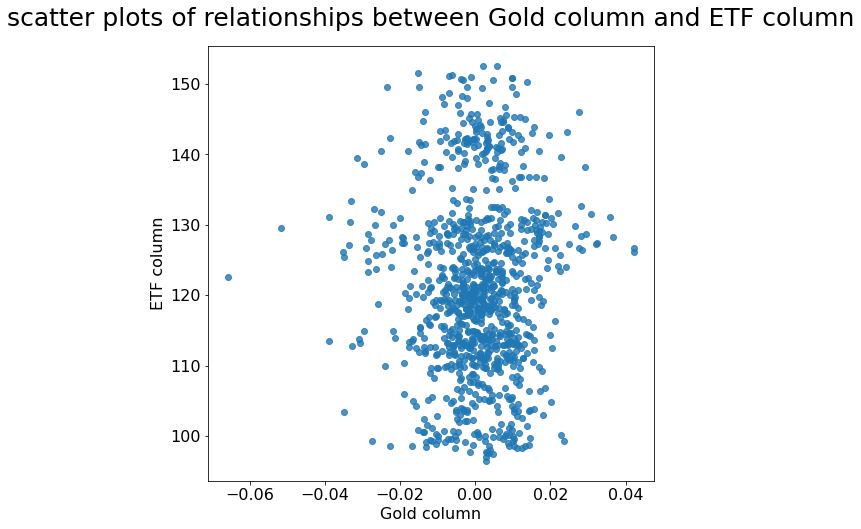

In [249]:
plt.figure(figsize=(8, 8))
plt.scatter(df.gold,df.Close_ETF,alpha=0.8)
plt.xlabel('Gold column', fontsize=16)
plt.ylabel("ETF column", fontsize=16)
plt.title("scatter plots of relationships between Gold column and ETF column", fontsize=25, color='black', pad=20)
plt.show()

Is there any linear relationship between them which can be observed from the scatter plot?


Answer:
    According to the plot, there is no linear relationship.

2) Calculate the coefficient of correlation between ETF and Gold and interpret it

In [250]:
import math
def computeCorrelation(x,y):
    xBar = np.mean(x)
    yBar = np.mean(y)
    SSR = 0.0
    varX = 0.0
    varY = 0.0
    for i in range(0,len(x)):
        diffXXbar = x[i] - xBar
        difYYbar = y[i] - yBar
        SSR += (diffXXbar * difYYbar)
        varX += diffXXbar**2
        varY += difYYbar**2
    SST = math.sqrt(varX * varY)
    return SSR/SST
print("\ncoefficient of correlation:")
print(computeCorrelation(df.gold, df.Close_ETF))


coefficient of correlation:
0.022995570076054628


interpret it:


Answer:
    The value of the coefficient of determination is very small, 
    which means there is not much correlation between ETF and Gold.

3) Fit a regression line (or least squares line, best fitting line) to the scatter plot. 
What are the intercept and slope of this line? 
How to interpret them?

intercept=121.135988
slope=25.604389


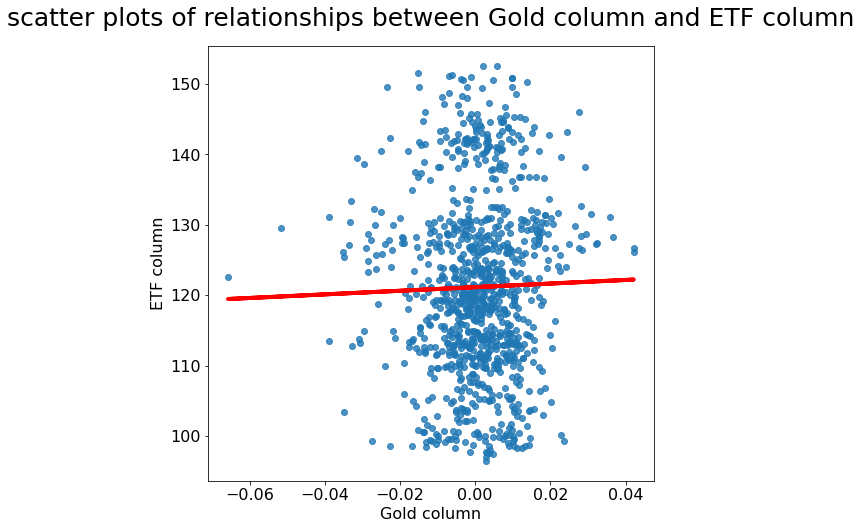

In [251]:
from sklearn import linear_model

# calculate intercept,slope
regr = linear_model.LinearRegression()
regr.fit(df.gold.values.reshape(-1, 1), df.Close_ETF)
a, b = regr.coef_, regr.intercept_
print("intercept=%f\nslope=%f"%(b,a))

# plot
plt.figure(figsize=(8, 8))
plt.scatter(df.gold,df.Close_ETF,alpha=0.8)
plt.xlabel('Gold column', fontsize=16)
plt.ylabel("ETF column", fontsize=16)
plt.title("scatter plots of relationships between Gold column and ETF column", fontsize=25, color='black', pad=20)

plt.plot(df.gold, regr.predict(df.gold.values.reshape(-1, 1)), color='red', linewidth=4)
plt.show()



Answer:

    intercept=121.135988;
    slope=25.604389; 
    So, we can find the formula of regression line: y = intercept + slope*x = 121.135988 + 25.604389x

 4) Conduct a two-tailed t-test with H0:Beta1 = 0. What is the P-value of the test? 
 Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01?
 Why or why not?

In [252]:
import statsmodels.api as sm
X1 = sm.add_constant(df.gold)
results = sm.OLS(df.Close_ETF, X1).fit()

slope = results.params[1]
t_value = (slope - 0)/results.bse[1] #bse = standard error
p_value = stats.t.sf(t_value, results.df_resid) #calculate p-value
print("slope = " + str(slope))
print("p_value = " + str(p_value))

slope = 25.604389324427302
p_value = 0.23380589030914678


Interpret results:

 Since the P-value is bigger than the significance level (0.01), we cannot reject the null hypothesis.
 We can conclude that linear relationship between ETF (Y) and Gold (X) is not significant at the significance level 0.01

 5) Suppose that you use the coefficient of determination to assess the quality of this fitting. 
 Is it a good model? Why or why not?

In [253]:
def polyfit(x,y,degree):
    results = {}
    coeffs = np.polyfit(x,y,degree)
    # results['polynomial'] = coeffs.tolist()
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat - ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results = ssreg/sstot
    return results

print("coefficient of determination:")
print(polyfit(df.gold, df.Close_ETF, 1))

coefficient of determination:
0.0005287962431226455


Answer : 
    It is not a good model.
    Because this coefficient of determination is close to 0, 
    it shows that the prediction model has almost no predictive function.

 6) What are the assumptions you made for this model fitting? 

Answer：
    It can be seen from the poorly predicted model that there is not much correlation between ETF and gold price.
    This shows that the composition of this ETF may not contain gold-related components.

 7) Given the daily relative change in the gold price is 0.005127. 
 Calculate the 99% confidence interval of the mean daily ETF return, 
 and the 99% prediction interval of the individual daily ETF return.

In [254]:
sample_mean_ETF = np.mean(df.Close_ETF)
std_mean_ETF = np.std(df.Close_ETF,ddof=1)
print("mean = " + str(sample_mean_ETF) + ", std = " + str(std_mean_ETF))

from scipy import stats
# interval_ETF1 = stats.norm.interval(0.99, loc=sample_mean_ETF, scale=std_mean_ETF) # z test
interval_ETF = stats.t.interval(0.99,1000-1,sample_mean_ETF,std_mean_ETF)  # t test
print("99% confidence interval = ", interval_ETF)

# the 99% prediction interval
regr = linear_model.LinearRegression()
regr.fit(df.gold.values.reshape(-1, 1), df.Close_ETF)
a, b = regr.coef_, regr.intercept_
pred_y = b + a*(0.005127)
t_value = 2.581
pred_y_upper_limit = pred_y + t_value*std_mean_ETF
pred_y_lower_limit = pred_y - t_value*std_mean_ETF
print("Given the daily relative change in the gold price is 0.005127:")
print("99% prediction interval = ("+ str(pred_y_lower_limit) + ", "+ str(pred_y_upper_limit) + ")")


mean = 121.152960012, std = 12.569790313110744
99% confidence interval =  (88.71335252300617, 153.59256750099382)
Given the daily relative change in the gold price is 0.005127:
99% prediction interval = ([88.8246334], [153.709891])


# Part 9 Model Prediction

Consider the data including the ETF, Gold and Oil column. Using any software, 
fit a multiple linear regression model to the data with the ETF variable as the response. 
Evaluate your model with adjusted 𝑅2

In [255]:
import statsmodels.api as sm

dataX = {"gold":df.gold,"oil":df.oil}
dataX_df = pd.DataFrame(dataX)

# calculate coefficients，intercept
regr = linear_model.LinearRegression()
regr.fit(dataX_df, df.Close_ETF)
# print('coefficients(b1,b2...):',regr.coef_)
# print('intercept(b0):',regr.intercept_)

# calculate 𝑅2
X1 = sm.add_constant(dataX_df)
result = sm.OLS(df.Close_ETF, X1).fit()
print("adjusted R-squared = ",result.rsquared_adj)

adjusted R-squared =  -0.0012542162846489457


# Part 10 Checking residualsand model selection

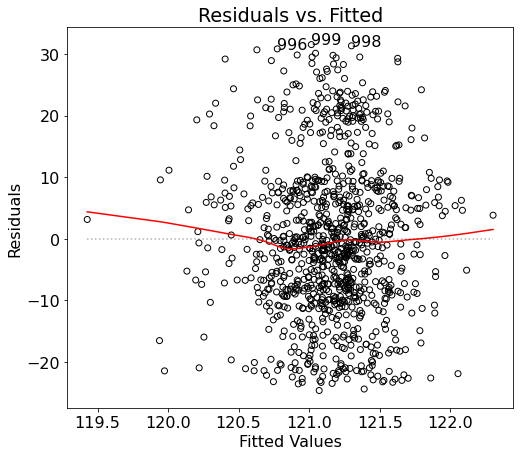

In [256]:
residuals = result.resid
fitted = result.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

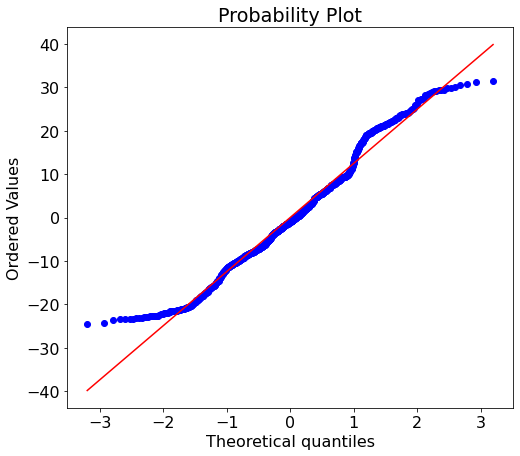

In [257]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

From the Probability plot of the residuals we can see that the resdiuals follow normal distribution even with some outliers.
Also from the residuals vs. fitted valued plots, most of the data gather between 121 and 121.5 fitted values at 0 of the residuals. So this may inform that the variance of the terms might not be equal. And since the residuals does bounce randomly around the 0 lines we can say that the relationship is linear. Also we are able to see there are outliers in the plots.<br>

For model selection we can calculate AIC and BIC and use forward or backward stepwise to find the best features to use.